In [135]:
import pandas as pd
import numpy as np
import os

In [136]:
dir_name = os.getcwd()
dir_name

'c:\\Users\\Владимир\\Documents\\Python\\CO2RR_PISH'

# Data preprocessing

## Features managing

In [137]:
fe = pd.read_csv(f"{dir_name}\\Datasets\\row_dataset.csv")

In [138]:
fe.head()

,Unnamed: 0,Number,Autor,Publication,Title,Journal,IF,DOI,Article name,Formula,...,"Time, h","Current density, mA/cm2",Type of reactor,"Energy efficiency, %",Сarbon efficiency (equivalent to single-pass carbon efficiency (SPCE),"Loading, μg/cm2","Capacitance, (uF/cm2)","ECSA, cm2",R,"BET surface, m2/g"
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,331.00,283,NaN,NaN,NaN,331.0,NaN,NaN,NaN
1,1,2.0,"Yilong Dong, Xingcheng Ma, Zhaoyong Jin, Xiaoc...",2024.0,Full-exposed Cu site of Cu2O-(1 0 0) driven hi...,Applied Surface Science,"7,392",https://doi.org/10.1016/j.apsusc.2023.159243,c-Cu2O,Cu2O,...,NaN,-2.93,H-cell,NaN,NaN,713.19,1010.0,NaN,NaN,NaN
2,2,2.0,"Yilong Dong, Xingcheng Ma, Zhaoyong Jin, Xiaoc...",2024.0,Full-exposed Cu site of Cu2O-(1 0 0) driven hi...,Applied Surface Science,"7,392",https://doi.org/10.1016/j.apsusc.2023.159243,c-Cu2O,Cu2O,...,NaN,-2.93,H-cell,NaN,NaN,713.19,1010.0,NaN,NaN,NaN
3,3,2.0,"Yilong Dong, Xingcheng Ma, Zhaoyong Jin, Xiaoc...",2024.0,Full-exposed Cu site of Cu2O-(1 0 0) driven hi...,Applied Surface Science,"7,392",https://doi.org/10.1016/j.apsusc.2023.159243,c-Cu2O,Cu2O,...,NaN,-2.93,H-cell,NaN,NaN,713.19,1010.0,NaN,NaN,NaN
4,4,2.0,"Yilong Dong, Xingcheng Ma, Zhaoyong Jin, Xiaoc...",2024.0,Full-exposed Cu site of Cu2O-(1 0 0) driven hi...,Applied Surface Science,"7,392",https://doi.org/10.1016/j.apsusc.2023.159243,o-Cu2O,Cu2O,...,NaN,-2.69,H-cell,NaN,NaN,713.19,50.0,NaN,NaN,NaN


In [139]:
fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 41 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Unnamed: 0                                                             1826 non-null   int64  
 1   Number                                                                 1542 non-null   float64
 2   Autor                                                                  1182 non-null   object 
 3   Publication                                                            1824 non-null   float64
 4   Title                                                                  1824 non-null   object 
 5   Journal                                                                1706 non-null   object 
 6   IF                                                                     1224 non-null   o

In [140]:
fe.columns

Index(['Unnamed: 0', 'Number', 'Autor', 'Publication', 'Title', 'Journal',
       'IF', 'DOI', 'Article name', 'Formula', 'Cat. compound', 'Support',
       'Cat./Support ratio, % (at)', 'Morphology (TEM/SEM)', 'Pore size, nm',
       'width min (nm)', 'width aver (nm)', 'width max (nm)',
       'length min (nm)', 'length aver (nm)', 'length max (nm)', 'Cu, % (at.)',
       'Cu+, % (at.)', 'Cu(2+), % (at.)', 'Base', 'electrolyte', 'conc, M',
       'pH', 'RHE vs V', 'Product', 'FE, %', 'Time, h',
       'Current density, mA/cm2', 'Type of reactor', ' Energy efficiency, %',
       'Сarbon efficiency (equivalent to single-pass carbon efficiency (SPCE)',
       'Loading, μg/cm2', 'Capacitance, (uF/cm2)', 'ECSA, cm2', 'R',
       'BET surface, m2/g'],
      dtype='object')

In [141]:
fe_cl = fe.copy()

#Delete columns as they are non-informative for our research
fe_cl = fe_cl.drop(["Number", "Autor", "Publication", "Title", "Journal"], axis=1)

In [142]:
# Empty DOI is a sign, that data isn't corresponding to the dataframe. Need to check, do this artcile have any usefull information at all
fe_cl[fe_cl.loc[:,"DOI"].isna()]

,Unnamed: 0,IF,DOI,Article name,Formula,Cat. compound,Support,"Cat./Support ratio, % (at)",Morphology (TEM/SEM),"Pore size, nm",...,"Time, h","Current density, mA/cm2",Type of reactor,"Energy efficiency, %",Сarbon efficiency (equivalent to single-pass carbon efficiency (SPCE),"Loading, μg/cm2","Capacitance, (uF/cm2)","ECSA, cm2",R,"BET surface, m2/g"
0,0,NaN,NaN,NaN,NaN,NaN,,NaN,0,1165.0,...,NaN,331.0,283,NaN,NaN,NaN,331.0,NaN,NaN,NaN
905,905,5.4,NaN,NaN,NaN,Cu,NaN,NaN,needle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,906,5.4,NaN,NaN,NaN,Annealed Cu nanoneedles,NaN,NaN,needle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,907,5.4,NaN,NaN,NaN,Annealed Cu nanoneedles,NaN,NaN,needle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
908,908,5.4,NaN,NaN,NaN,Annealed Cu nanoneedles,NaN,NaN,needle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,1184,41,NaN,NaN,NaN,Cu foil,NaN,NaN,film,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1185,1185,41,NaN,NaN,NaN,Cu foil,NaN,NaN,film,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1186,1186,41,NaN,NaN,NaN,Cu foil,NaN,NaN,film,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1187,1187,41,NaN,NaN,NaN,Cu foil,NaN,NaN,film,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# It seems like that they are totally empty. I am removing articles with empty "Formula" column
fe_cl = fe_cl.dropna(subset=["Formula"])
fe_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1445 entries, 1 to 1824
Data columns (total 36 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Unnamed: 0                                                             1445 non-null   int64  
 1   IF                                                                     845 non-null    object 
 2   DOI                                                                    1445 non-null   object 
 3   Article name                                                           1445 non-null   object 
 4   Formula                                                                1445 non-null   object 
 5   Cat. compound                                                          1445 non-null   object 
 6   Support                                                                1054 non-null   object

In [144]:
# Drop empty columns
empt_col = fe_cl.columns[fe_cl.isna().all()]
fe_cl = fe_cl.drop(empt_col, axis=1)

In [145]:
# Get list of columns with Nan values
print(fe_cl.columns[fe_cl.isna().any()])

Index(['IF', 'Support', 'Pore size, nm', 'length min (nm)', 'length aver (nm)',
       'length max (nm)', 'Time, h', 'Current density, mA/cm2',
       'Loading, μg/cm2', 'Capacitance, (uF/cm2)', 'ECSA, cm2',
       'BET surface, m2/g'],
      dtype='object')


Let's sum up, is it possible to fill empty columns:

'IF' - impfact factor, this column isn't necessary for the research\
'Support' - Nan values mean that catalyst consist only from one compound. Will fill by str value 'No'\
'Pore size, nm' - Nan values are specific for non-porous catalysts\
'length min (nm)', 'length aver (nm)', 'length max (nm)' - Nan values are specific for some types of catalyst morphology\
'Time, h' - Nan value will be replaced by the mode value\
'Capacitance, (uF/cm2)', 'Current density, mA/cm2' - it's impossible get this values, so this features will be dropped\
'ECSA, cm2', 'BET surface, m2/g', 'Loading, μg/cm2' -  too many empty values ((((


In [146]:
#Delete columns because not of all articles have such parameter
fe_cl = fe_cl.drop(['Unnamed: 0', 'IF', 'Capacitance, (uF/cm2)', 'Current density, mA/cm2','ECSA, cm2', 'BET surface, m2/g', 'Loading, μg/cm2'], axis=1)

#Drop row with filter from Google sheet
fe_cl = fe_cl.drop(fe_cl.index[0])
fe_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444 entries, 2 to 1824
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DOI                         1444 non-null   object 
 1   Article name                1444 non-null   object 
 2   Formula                     1444 non-null   object 
 3   Cat. compound               1444 non-null   object 
 4   Support                     1054 non-null   object 
 5   Cat./Support ratio, % (at)  1444 non-null   float64
 6   Morphology (TEM/SEM)        1444 non-null   object 
 7   Pore size, nm               277 non-null    float64
 8   width min (nm)              1444 non-null   float64
 9   width aver (nm)             1444 non-null   float64
 10  width max (nm)              1444 non-null   float64
 11  length min (nm)             1161 non-null   float64
 12  length aver (nm)            1161 non-null   float64
 13  length max (nm)             1161 non-n

All remaining Nan values will be filled in the next part

## Checking correct format of data

In [147]:
print(fe_cl.select_dtypes(include="object").columns)

#Seems like 'RHE vs V', which is float value is object now. We need to check values

Index(['DOI', 'Article name', 'Formula', 'Cat. compound', 'Support',
       'Morphology (TEM/SEM)', 'Base', 'electrolyte', 'Product',
       'Type of reactor'],
      dtype='object')


In [148]:
# Let's check unique values for some numerical columns
to_check = ['Cat. compound', 'Support','Morphology (TEM/SEM)', 'Base', 'electrolyte', 'Product', 'Type of reactor']
for col in to_check:
    print(f"\n {col}: {fe_cl[col].unique()}")


 Cat. compound: ['Cu2O' 'Cu' 'CuO' ' CuO']

 Support: [nan 'Cu' 'Cu2O' 'Cu3N' 'C0.902O0.074N0.024' 'C0.912O0.054N0.017' 'CuO'
 'Cu(OH)2' 'N' 'Ag' ' Ag' 'Pd' 'Au']

 Morphology (TEM/SEM): ['cubic' 'octahedron' 'dodecahedron' 'polyhedron' 'nanorod' 'sphere'
 'hollow' 'nanowire' 'porrous cuboctahedron' 'cuboctahedron'
 'porrous spherical' ' irregular solid blocks' 'dendritic']

 Base: ['glassy-carbon electrode' 'carbon paper electrode'
 'gasdiffusion electrode' 'gas diffusion layer']

 electrolyte: ['KHCO3' 'KOH' 'KCl']

 Product: ['H2' 'CO' 'C2H4' 'C2H5OH' 'CH4' 'HCOOH' 'C3H7OH' 'CH3OH' 'CH3COOH'
 'C3H6O' 'C2H6']

 Type of reactor: ['H-cell' 'Flow cell']


In [149]:
# 1. we can see that in support column there is duplicates with space. We need to rename them to a normal format
# 2. we can see that in the df there are catalyst with complex structure such as: C0.902O0.074N0.024. It is important to drop them due to their class
# 3. Also there is a duplication in a Base name. Some of them are one, but called in a different name

fe_cl["Base"] = fe_cl["Base"].replace('gas diffusion layer', "gasdiffusion electrode")
val_to_drop = fe_cl['Support'].isin(['C0.902O0.074N0.024', 'C0.912O0.054N0.017'])
fe_cl = fe_cl[~val_to_drop]
fe_cl = fe_cl.reset_index(drop=True)

In [150]:
# Firstly I replaced nan values in the "Support" columns by string "No", after deleted additional spaces in the compounds' names
fe_cl["Support"] = fe_cl["Support"].fillna(value="No")
for i in range(0, len(fe_cl)):
    val = fe_cl.loc[i, "Cat. compound"]
    try:
        fe_cl.loc[i, "Cat. compound"] = val.replace(" ", "")
    except AttributeError:
        print(val)

for i in range(0, len(fe_cl)):
    val = fe_cl.loc[i, "Support"]
    fe_cl.loc[i, "Support"] = val.replace(" ", "")

In [151]:
to_check = ['Cat. compound', 'Support','Morphology (TEM/SEM)', 'Base', 'electrolyte', 'Product', 'Type of reactor']
for col in to_check:
    print(f"\n {col}: {fe_cl[col].unique()}")


 Cat. compound: ['Cu2O' 'Cu' 'CuO']

 Support: ['No' 'Cu' 'Cu2O' 'Cu3N' 'CuO' 'Cu(OH)2' 'N' 'Ag' 'Pd' 'Au']

 Morphology (TEM/SEM): ['cubic' 'octahedron' 'dodecahedron' 'polyhedron' 'nanorod' 'sphere'
 'hollow' 'nanowire' 'porrous cuboctahedron' 'cuboctahedron'
 'porrous spherical' ' irregular solid blocks' 'dendritic']

 Base: ['glassy-carbon electrode' 'carbon paper electrode'
 'gasdiffusion electrode']

 electrolyte: ['KHCO3' 'KOH' 'KCl']

 Product: ['H2' 'CO' 'C2H4' 'C2H5OH' 'CH4' 'HCOOH' 'C3H7OH' 'CH3OH' 'CH3COOH'
 'C3H6O' 'C2H6']

 Type of reactor: ['H-cell' 'Flow cell']


## Filling Nan values

In [153]:
fe_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DOI                         1391 non-null   object 
 1   Article name                1391 non-null   object 
 2   Formula                     1391 non-null   object 
 3   Cat. compound               1391 non-null   object 
 4   Support                     1391 non-null   object 
 5   Cat./Support ratio, % (at)  1391 non-null   float64
 6   Morphology (TEM/SEM)        1391 non-null   object 
 7   Pore size, nm               277 non-null    float64
 8   width min (nm)              1391 non-null   float64
 9   width aver (nm)             1391 non-null   float64
 10  width max (nm)              1391 non-null   float64
 11  length min (nm)             1108 non-null   float64
 12  length aver (nm)            1108 non-null   float64
 13  length max (nm)             1108 

In [154]:
print(fe_cl.columns[fe_cl.isna().any()])

Index(['Pore size, nm', 'length min (nm)', 'length aver (nm)',
       'length max (nm)', 'Time, h'],
      dtype='object')


In [155]:
# For some geometry there ia no length so imply nan like 0
fe_cl["length min (nm)"] = fe_cl["length min (nm)"].fillna(0)
fe_cl["length max (nm)"] = fe_cl["length max (nm)"].fillna(0)
fe_cl["length aver (nm)"] = fe_cl["length aver (nm)"].fillna(0)
fe_cl["Pore size, nm"] = fe_cl["Pore size, nm"].fillna(0)

# For some catalyst test no information about time, but the most common is 1 hour
fe_cl["Time, h"] = fe_cl["Time, h"].fillna(1)

# Some catalysts concsist from one metall so there is no support compound
fe_cl["Support"] = fe_cl["Support"].fillna("No")
fe_cl["Cat./Support ratio, % (at)"] = fe_cl["Cat./Support ratio, % (at)"].fillna(100)

# I am filling information about the average size of particles, there is no information about it
nan_width = fe_cl[fe_cl["width aver (nm)"].isna()].index
fe_cl.loc[nan_width, "width aver (nm)"] = (fe_cl.loc[nan_width,"width min (nm)"]+ fe_cl.loc[nan_width,"width max (nm)"])/2
nan_len = fe_cl[fe_cl["length aver (nm)"].isna()].index
fe_cl.loc[nan_len, "length aver (nm)"] = (fe_cl.loc[nan_len, "length min (nm)"] + fe_cl.loc[nan_len, "length max (nm)"])/2

In [156]:
print(fe_cl.columns[fe_cl.isna().any()])

Index([], dtype='object')


There is no nan values, so this part is ended

In [157]:
print(f"The number of unic catalysts: {len(fe_cl.groupby(by=['DOI', 'Article name']).groups)}")

The number of unic catalysts: 40


# Data analysis

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
fe_cl.select_dtypes(include=["object"]).columns

Index(['DOI', 'Article name', 'Formula', 'Cat. compound', 'Support',
       'Morphology (TEM/SEM)', 'Base', 'electrolyte', 'Product',
       'Type of reactor'],
      dtype='object')

In [160]:
#We will build plots for several columns with object type values
obj_col_for_an = ['Cat. compound', 'Support','Morphology (TEM/SEM)', 'Base', 'electrolyte', 'Product', 'Type of reactor']

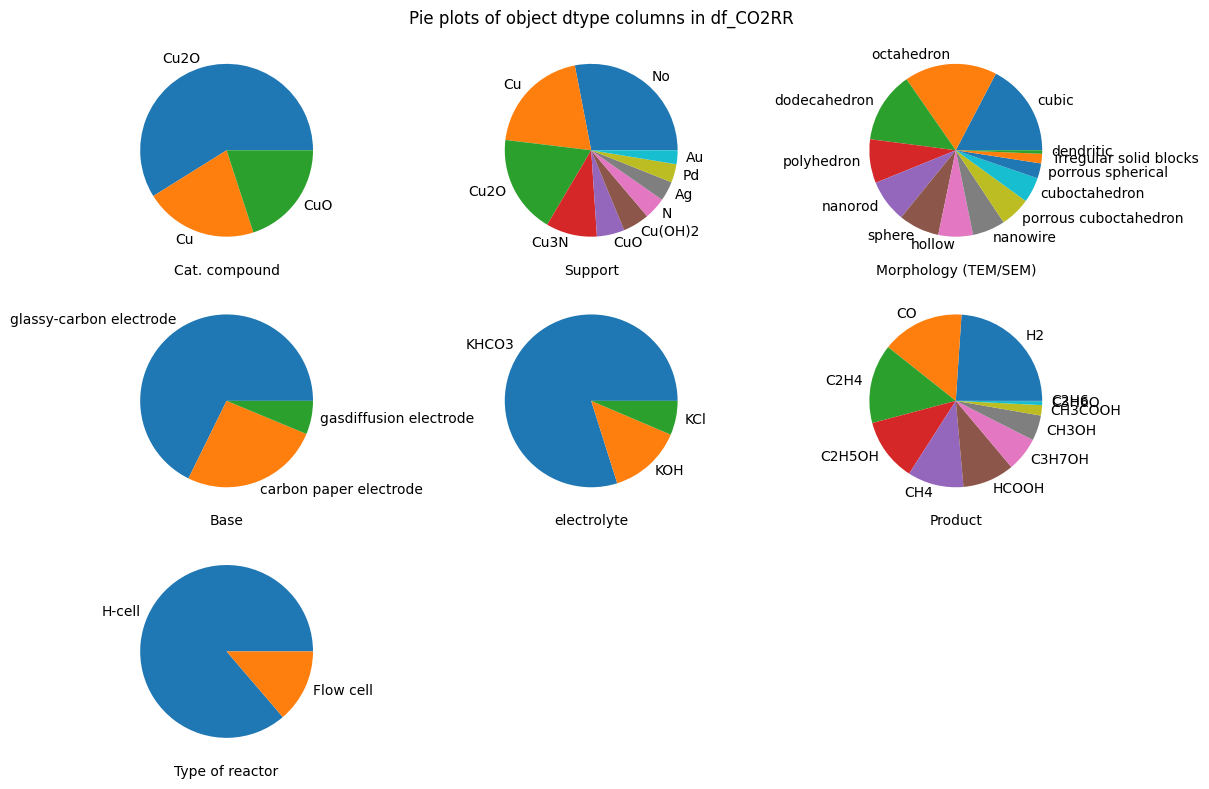

In [162]:
nrows = (len(obj_col_for_an) // 3) + (1 if len(obj_col_for_an) % 3 != 0 else 0)
fig, ax = plt.subplots(nrows, 3, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(obj_col_for_an):
    # plt.pie(fe_cl[col].value_counts(), ax=ax[i])
    ax[i].pie(fe_cl[col].value_counts(), labels=fe_cl[col].unique())
    ax[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

fig.suptitle("Pie plots of object dtype columns in df_CO2RR")
plt.tight_layout()
plt.show()

In [163]:
#It seems like, that there is a product with low amount of entries
fe_cl["Product"].value_counts().to_dict()

{'C2H4': 333,
 'H2': 214,
 'CO': 206,
 'CH4': 164,
 'C2H5OH': 146,
 'HCOOH': 135,
 'C3H7OH': 89,
 'CH3COOH': 66,
 'CH3OH': 27,
 'C3H6O': 10,
 'C2H6': 1}

In [164]:
fe_cl["Product"] = fe_cl["Product"].replace("CH24", "C2H4")
fe_cl= fe_cl[~fe_cl["Product"].isin(["C3H6O", "C2H6"])]

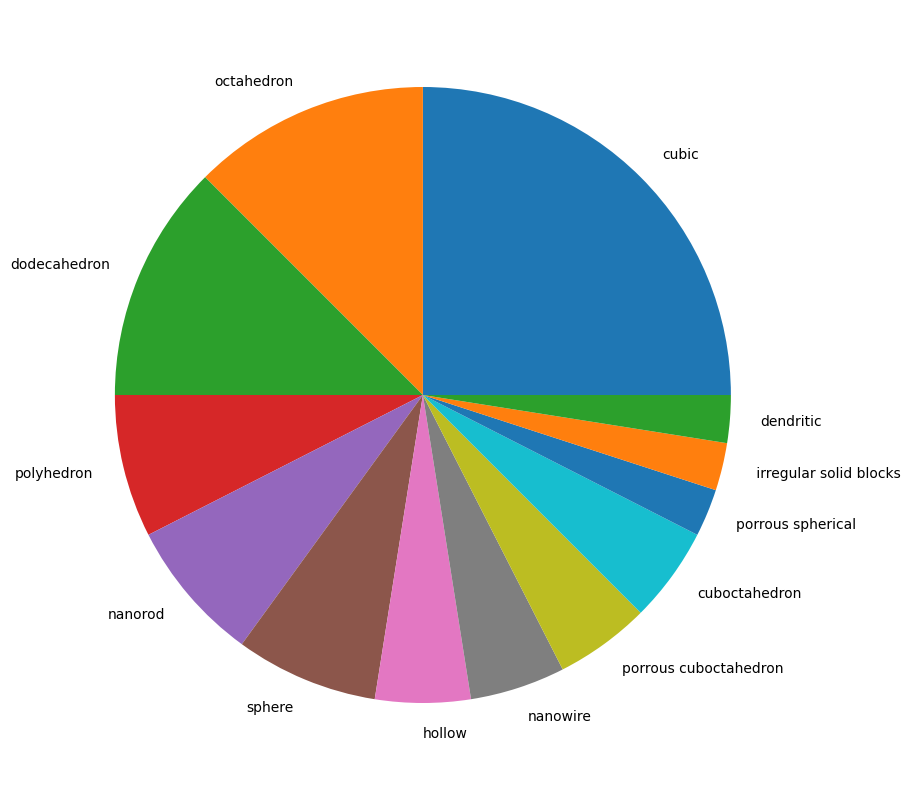

In [166]:
fe_gr = fe_cl[["DOI", "Article name", "Morphology (TEM/SEM)"]].copy()
fe_gr = fe_gr.drop_duplicates()
plt.figure(figsize=(13,8))
plt.pie(fe_gr["Morphology (TEM/SEM)"].value_counts(), labels=fe_gr["Morphology (TEM/SEM)"].unique())
plt.tight_layout()
plt.show()

In [167]:
fe_gr["Morphology (TEM/SEM)"].value_counts()

Morphology (TEM/SEM)
cubic                      10
hollow                      5
sphere                      5
octahedron                  3
nanorod                     3
nanowire                    3
dodecahedron                2
dendritic                   2
porrous spherical           2
 irregular solid blocks     2
polyhedron                  1
porrous cuboctahedron       1
cuboctahedron               1
Name: count, dtype: int64

The forhcoming data collection must be focused on obtaining catalyst with morphologies: polyhedron, porrous cuboctahedron, cuboctahedron

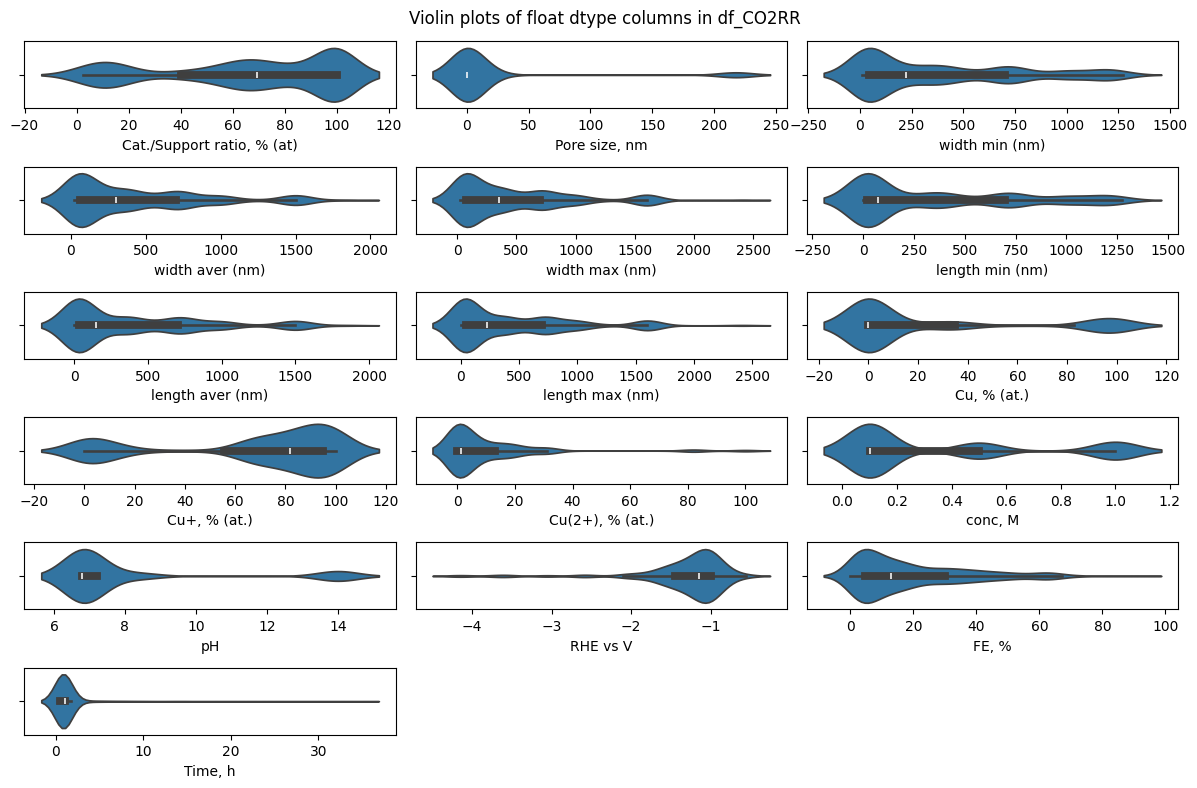

In [168]:
# Violin plots for float columns
float_cols = fe_cl.select_dtypes(include='float').columns
num_float_cols = len(float_cols)

# Determine the grid size for subplots
nrows = (num_float_cols // 3) + (1 if num_float_cols % 3 != 0 else 0)
fig, ax = plt.subplots(nrows, 3, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(float_cols):
    sns.violinplot(data=fe_cl, x=col, ax=ax[i])
    ax[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

fig.suptitle("Violin plots of float dtype columns in df_CO2RR")
plt.tight_layout()
plt.show()


Everything looks fine. There is no outliers, only extreme values, which are explained in the articles

In [169]:
products = fe_cl["Product"].unique()
print(products)

['H2' 'CO' 'C2H4' 'C2H5OH' 'CH4' 'HCOOH' 'C3H7OH' 'CH3OH' 'CH3COOH']


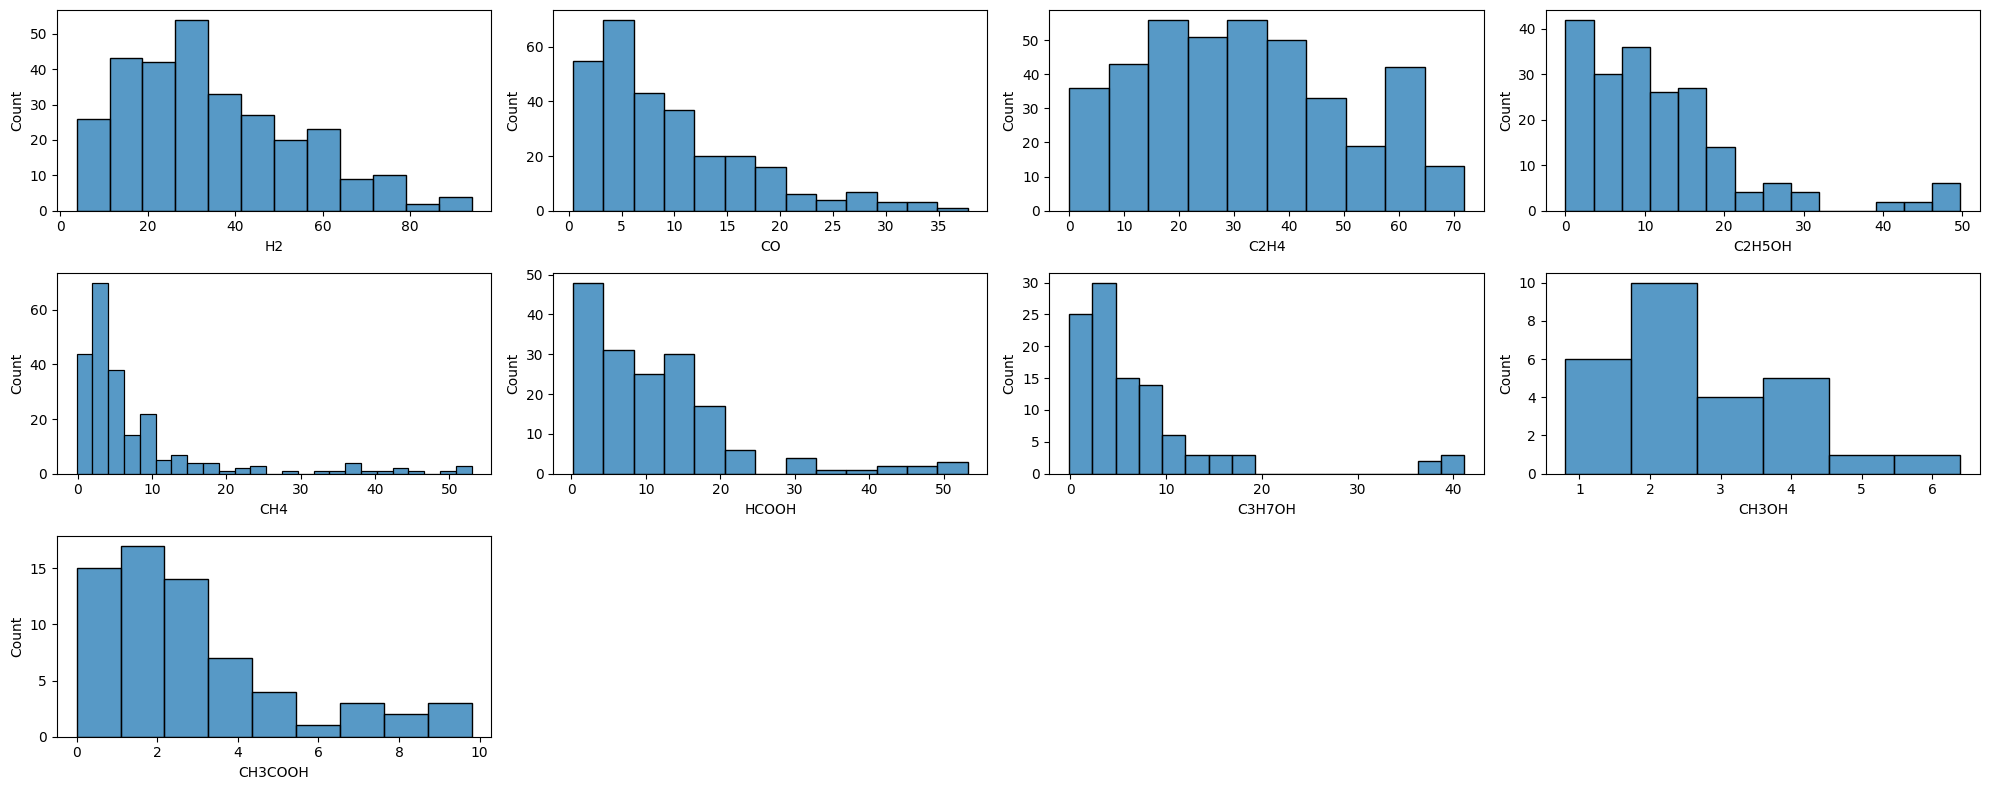

[<Axes: xlabel='H2', ylabel='Count'> <Axes: xlabel='CO', ylabel='Count'>
 <Axes: xlabel='C2H4', ylabel='Count'>
 <Axes: xlabel='C2H5OH', ylabel='Count'>
 <Axes: xlabel='CH4', ylabel='Count'>
 <Axes: xlabel='HCOOH', ylabel='Count'>
 <Axes: xlabel='C3H7OH', ylabel='Count'>
 <Axes: xlabel='CH3OH', ylabel='Count'>
 <Axes: xlabel='CH3COOH', ylabel='Count'> <Axes: > <Axes: > <Axes: >]


In [170]:
num_products = len(products)
nrows = (num_products // 4) + (1 if num_products % 4 != 0 else 0)
fig, ax = plt.subplots(nrows, 4, figsize=(20, 8))
ax = ax.flatten()

for i, prod in enumerate(products):
  sns.histplot(data=fe[fe["Product"] == prod]["FE, %"], ax=ax[i])
  ax[i].set_xlabel(prod)

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()
print(ax)


The values of catalyst efficiency have different types of distribution. It can cause some troubles during ML in future

<Axes: xlabel='length min (nm)', ylabel='Density'>

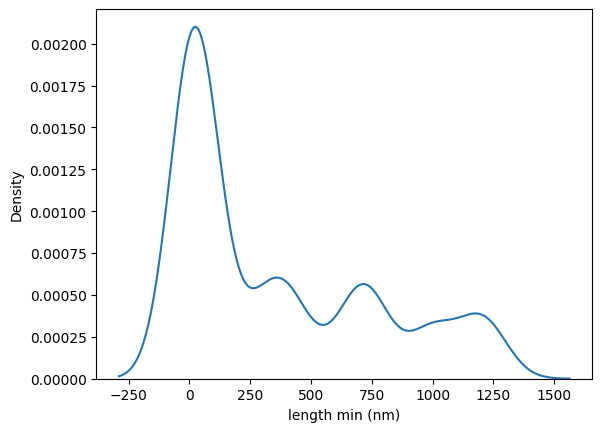

In [171]:
sns.kdeplot(data = fe_cl["length min (nm)"])

The most part of particles length is under 500 nm, but also there is a significant amount of macro partciles

In [111]:
# There is some highly-correleated columns, which will be dropped in ML code

In [172]:
#save file without descriptors
fe_cl.to_csv(f"{dir_name}\\Datasets\\prepr_.csv")